## Exploration et analyses des données chronologiques des ventes afin de réaliser un modéle de prédiction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Analyse exploratoire

**1 - Importation des données**

In [3]:
# importation des données
data = pd.read_excel("FAM FORECAST.xlsx")
df = pd.DataFrame(data)

In [4]:
# dévouverte de la forme des données
df.head()

DATE         FAM 1         FAM 2         FAM 3          FAM 4  \
0  201001  1.109436e+07  3.758963e+06  1.315854e+06  772280.656029   
1  201002  3.754209e+06  2.294199e+06  1.567287e+06            NaN   
2  201003  5.892462e+06  2.246095e+05  9.323532e+05   64200.000000   
3  201004  5.553461e+06  2.204361e+06  1.250791e+06  380741.353712   
4  201005  1.257417e+07  1.656627e+06  9.278913e+05  153423.843725   

          FAM 5         FAM 6  
0  1.803448e+05  1.672330e+06  
1  1.435516e+06  1.957590e+06  
2  4.656045e+06  3.809078e+06  
3  7.673226e+05  9.416443e+05  
4  1.471845e+06  7.880737e+05

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m')

**2 - Informations générales sur les données**

In [6]:
df.describe()

FAM 1         FAM 2         FAM 3         FAM 4         FAM 5  \
count  1.440000e+02  1.440000e+02  1.440000e+02  1.310000e+02  1.440000e+02   
mean   7.684697e+06  2.110235e+06  1.646512e+06  4.162338e+05  1.866533e+06   
std    2.664613e+06  8.689699e+05  9.761805e+05  3.276785e+05  1.052458e+06   
min    3.684956e+06  2.246095e+05  1.089200e+04  6.368000e+03  1.803448e+05   
25%    5.738917e+06  1.504728e+06  1.059755e+06  1.339683e+05  1.104814e+06   
50%    7.243749e+06  1.998536e+06  1.422386e+06  3.102361e+05  1.707228e+06   
75%    8.910116e+06  2.588660e+06  2.043755e+06  6.207641e+05  2.340562e+06   
max    1.980878e+07  5.830632e+06  5.531775e+06  1.207213e+06  5.814432e+06   

              FAM 6  
count  1.440000e+02  
mean   1.409090e+06  
std    8.594072e+05  
min    1.088354e+05  
25%    8.159398e+05  
50%    1.141558e+06  
75%    1.986129e+06  
max    3.809078e+06

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    144 non-null    datetime64[ns]
 1   FAM 1   144 non-null    float64       
 2   FAM 2   144 non-null    float64       
 3   FAM 3   144 non-null    float64       
 4   FAM 4   131 non-null    float64       
 5   FAM 5   144 non-null    float64       
 6   FAM 6   144 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 8.0 KB


**3 - Vérification des valeurs manquantes**

In [8]:
valeurs_manquantes = df.isnull().sum()
pourcentage_manquant = (valeurs_manquantes / len(df)) * 100
infos_manquantes = pd.DataFrame({'Valeurs Manquantes': valeurs_manquantes, 'Pourcentage': pourcentage_manquant})
print(infos_manquantes)

       Valeurs Manquantes  Pourcentage
DATE                    0     0.000000
FAM 1                   0     0.000000
FAM 2                   0     0.000000
FAM 3                   0     0.000000
FAM 4                  13     9.027778
FAM 5                   0     0.000000
FAM 6                   0     0.000000


In [9]:
# remplace les valeurs manquantes avec la valeur précédente
df["FAM 4"] = df["FAM 4"].fillna(method='ffill')
df.isnull().sum()

DATE     0
FAM 1    0
FAM 2    0
FAM 3    0
FAM 4    0
FAM 5    0
FAM 6    0
dtype: int64

**4 - Visualisation des Données**

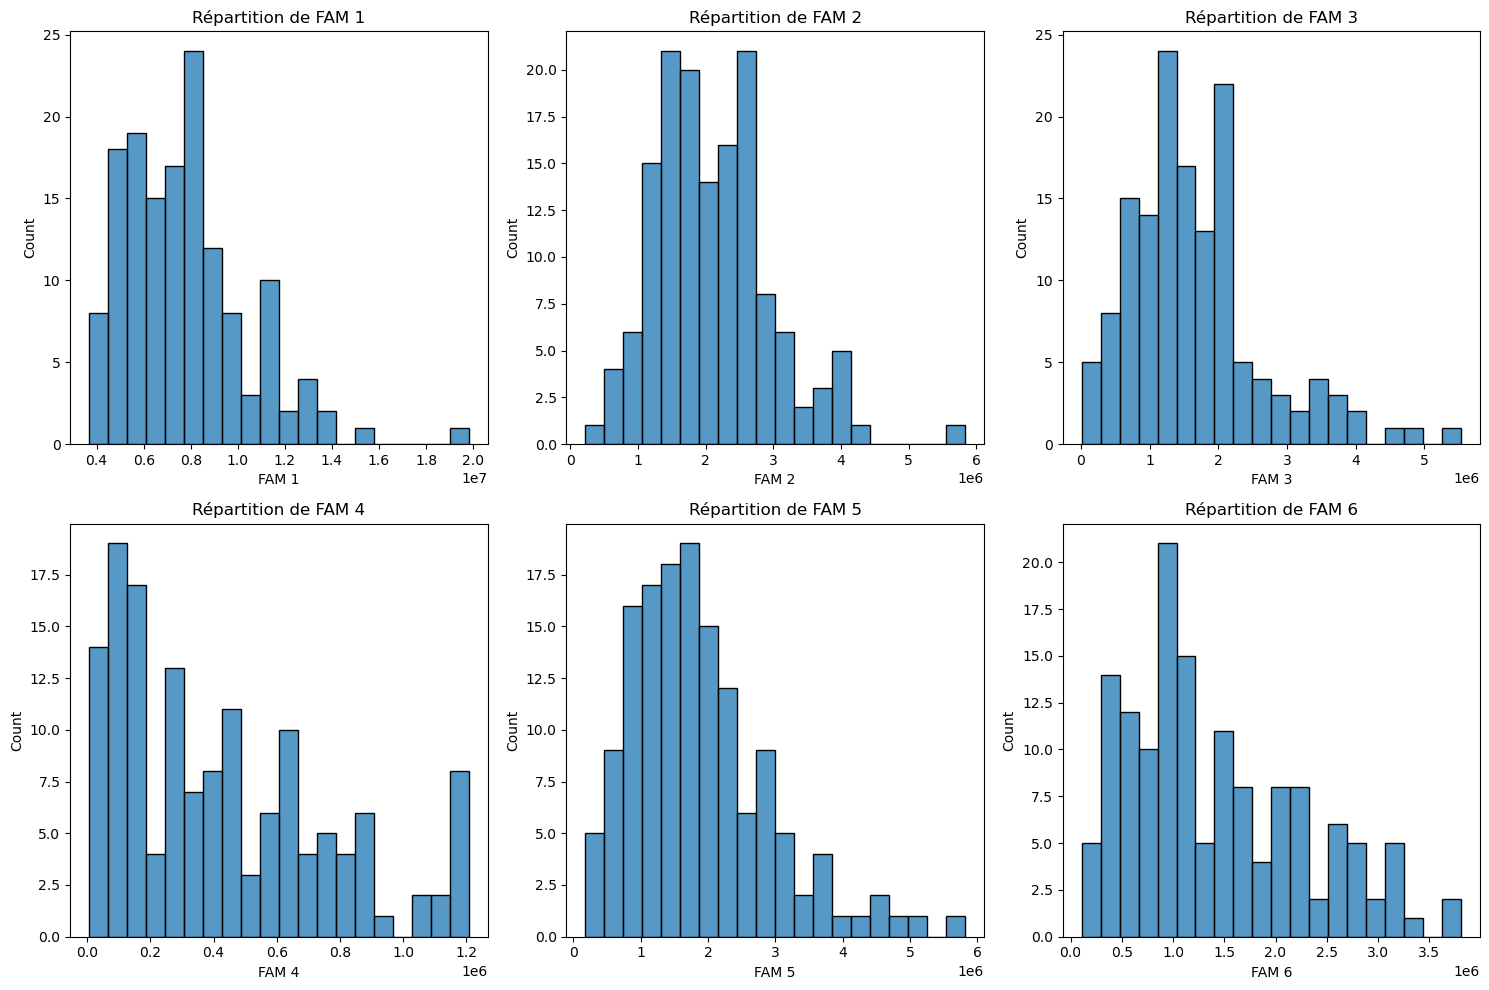

In [10]:
variables = ['FAM 1', 'FAM 2', 'FAM 3', 'FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=variable, bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Répartition de {variable}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**4 - Analyse des Séries Temporelles**

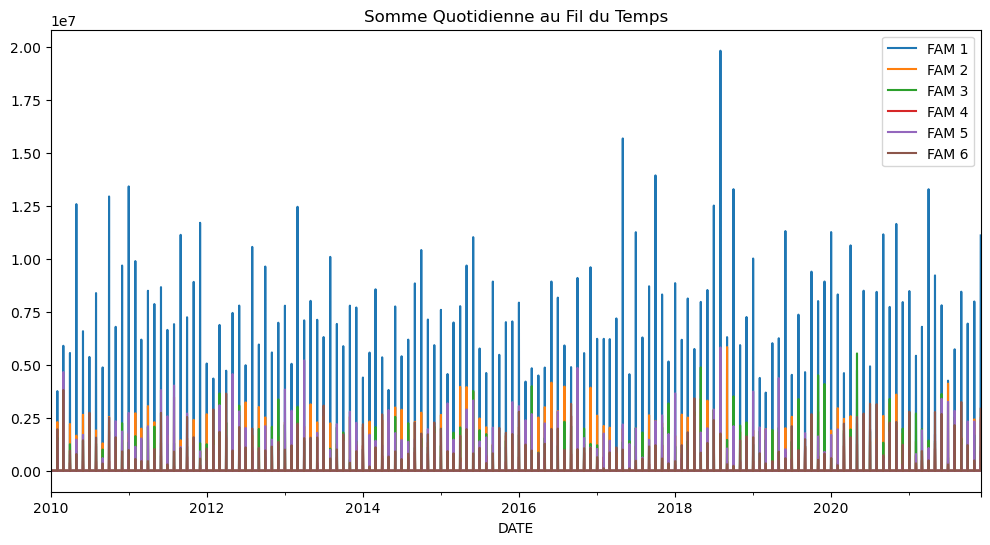

In [11]:
# En supposant que df a une colonne de dates 'timestamp'
df.set_index('DATE', inplace=True)
df.resample('D').sum().plot(figsize=(12, 6))
plt.title('Somme Quotidienne au Fil du Temps')
plt.show()

**5 - Exploration des Données Catégoriques**

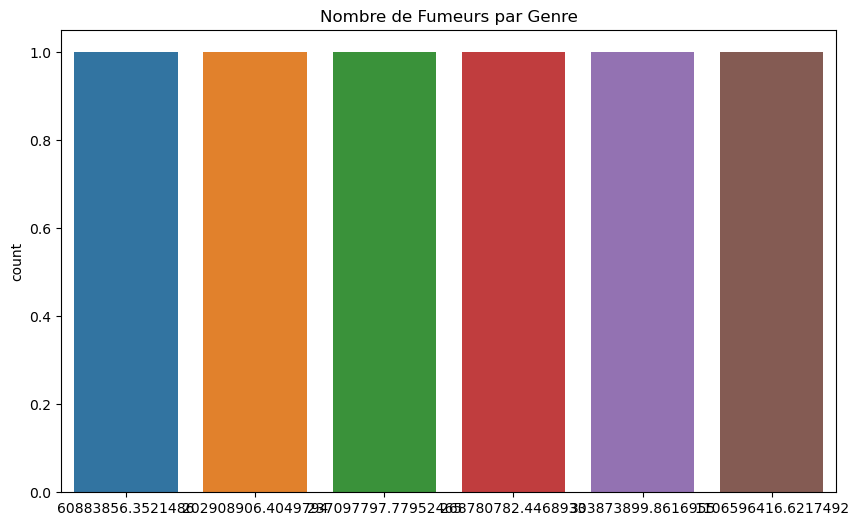

In [12]:
# Exemple : Diagramme en Barres
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df.sum())
plt.title('Nombre de Fumeurs par Genre')
plt.show()

**6 - Détection des Valeurs Aberrantes**

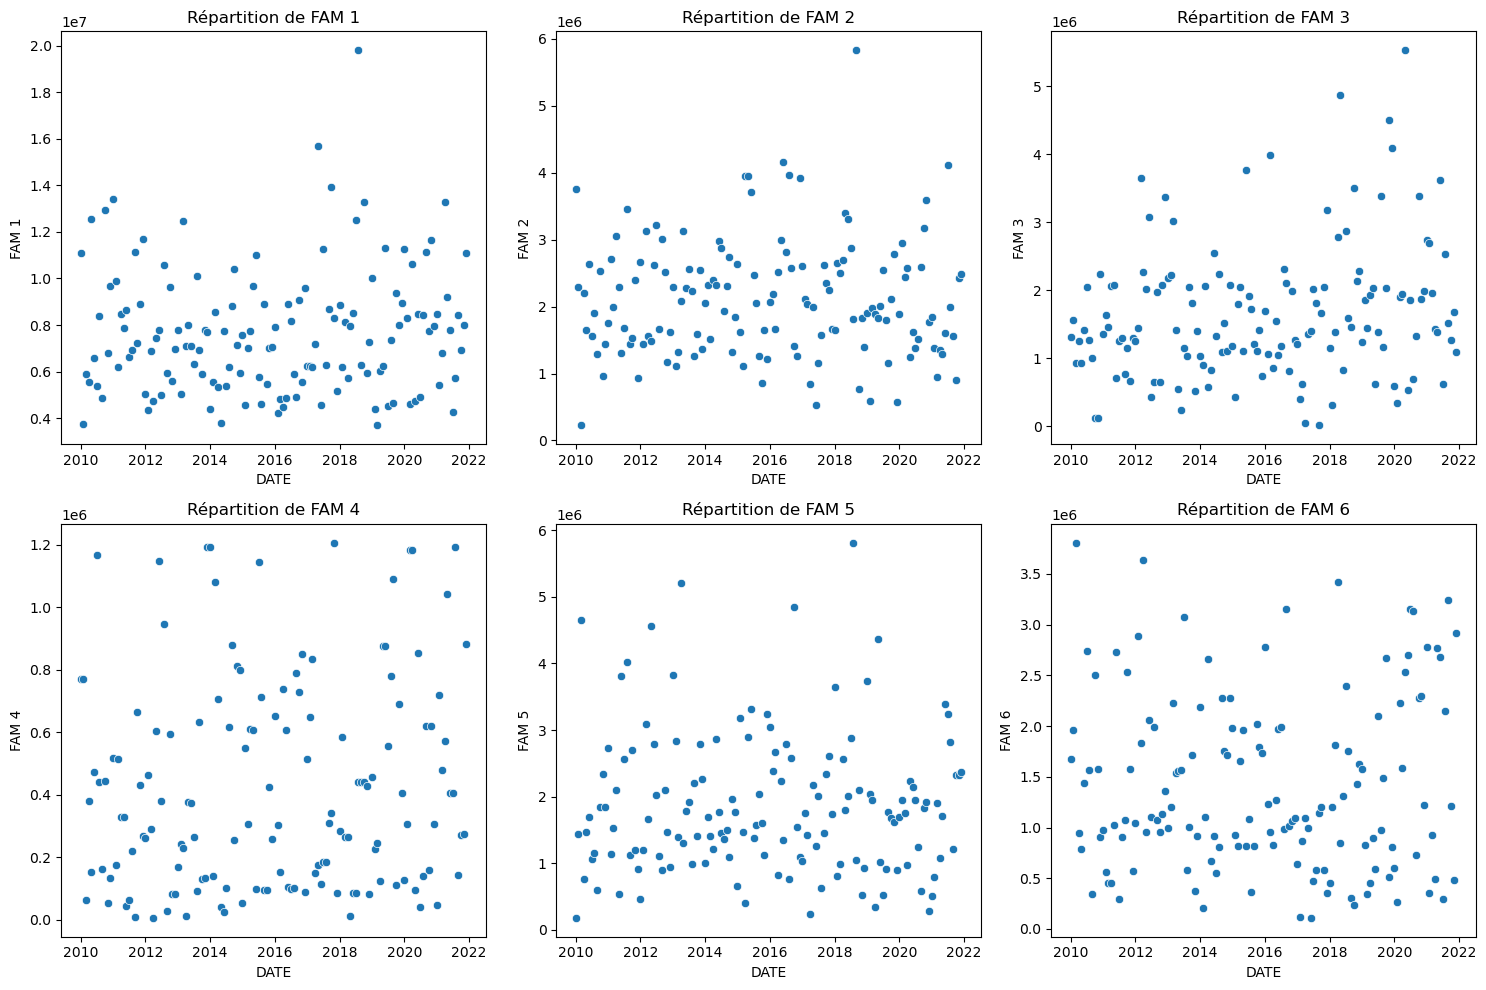

In [13]:
variables = ['FAM 1', 'FAM 2', 'FAM 3', 'FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df, x='DATE' , y=variable, ax=axes[row, col])
    axes[row, col].set_title(f'Répartition de {variable}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**7 - Evolution des ventes par famille**

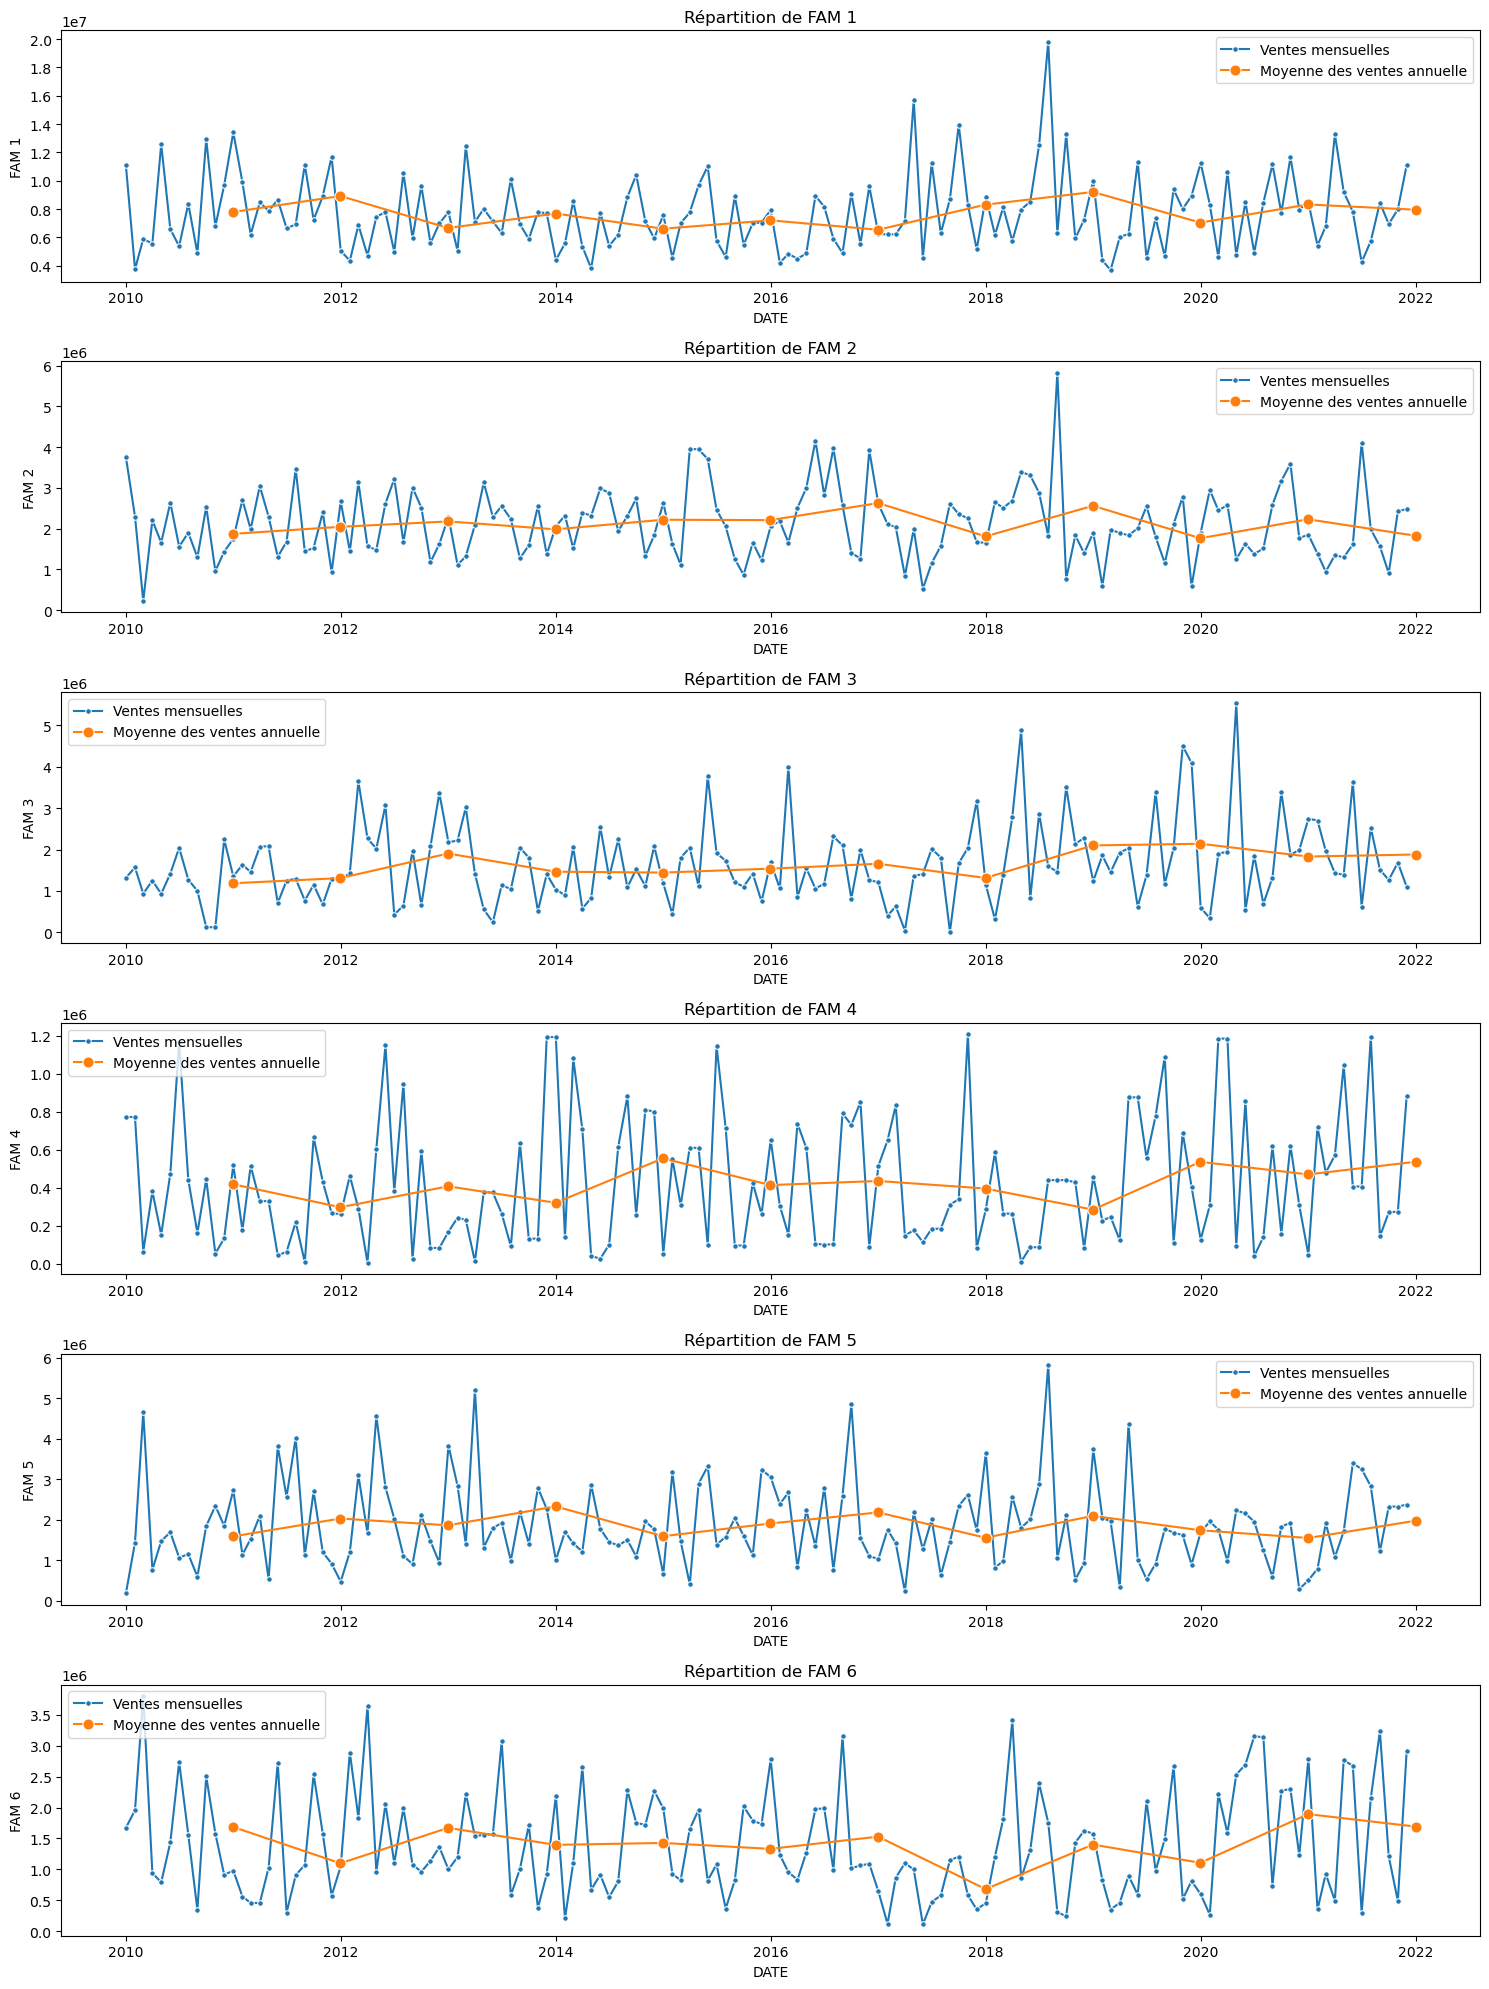

In [68]:
variables = ['FAM 1', 'FAM 2', 'FAM 3', 'FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    row = i 
    col = 1
    sns.lineplot(data=df, x='DATE' , y=variable, ax=axes[i],marker='o', markersize=4, linestyle='-', label='Ventes mensuelles')
    sns.lineplot(data=df[f"{variable}"].resample('Y').mean(), ax=axes[i],marker='o', markersize=8, linestyle='-', label='Moyenne des ventes annuelle')
    axes[i].set_title(f'Répartition de {variable}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

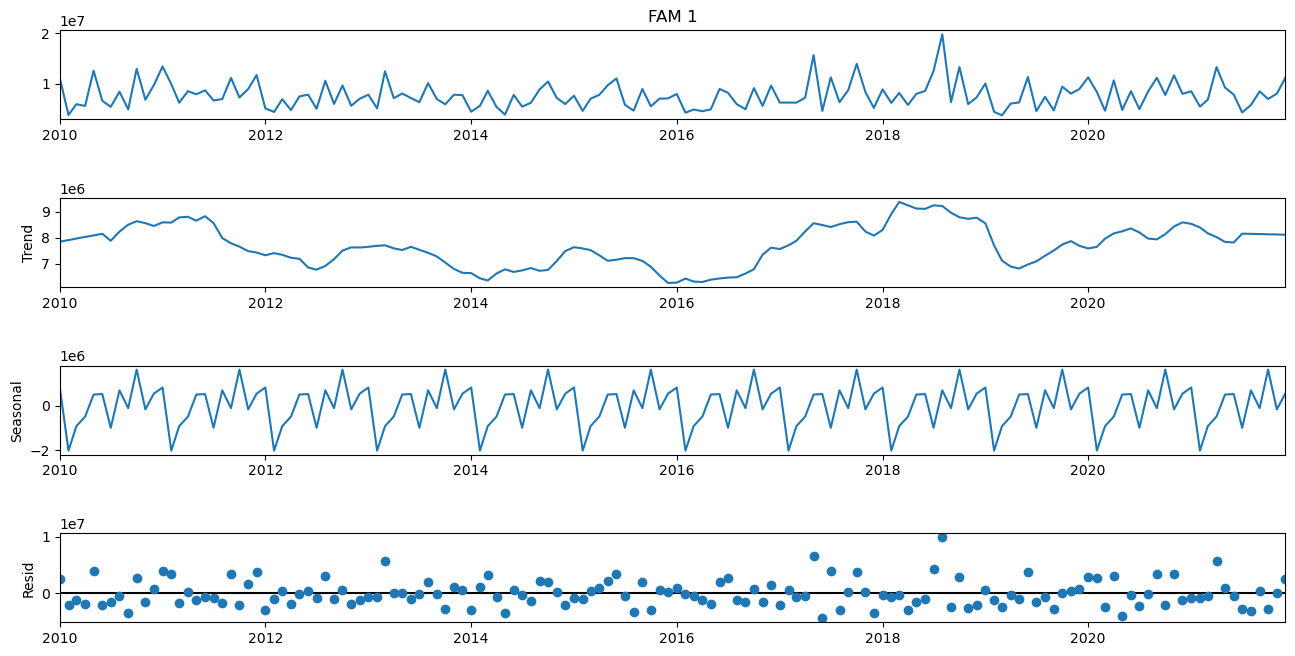

In [98]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
    
seasonal_decompose (df["FAM 1"])

## Modéles de prédiction

### Autorégression (AR)

La méthode d'autorégression (AR) modélise l'étape suivante de la séquence comme une fonction linéaire des observations aux pas de temps précédents.

La notation du modèle implique de spécifier l'ordre du modèle p comme paramètre de la fonction AR, par exemple AR(p). Par exemple, AR(1) est un modèle d’autorégression du premier ordre.

La méthode convient aux séries chronologiques univariées sans composantes de tendance et saisonnières.

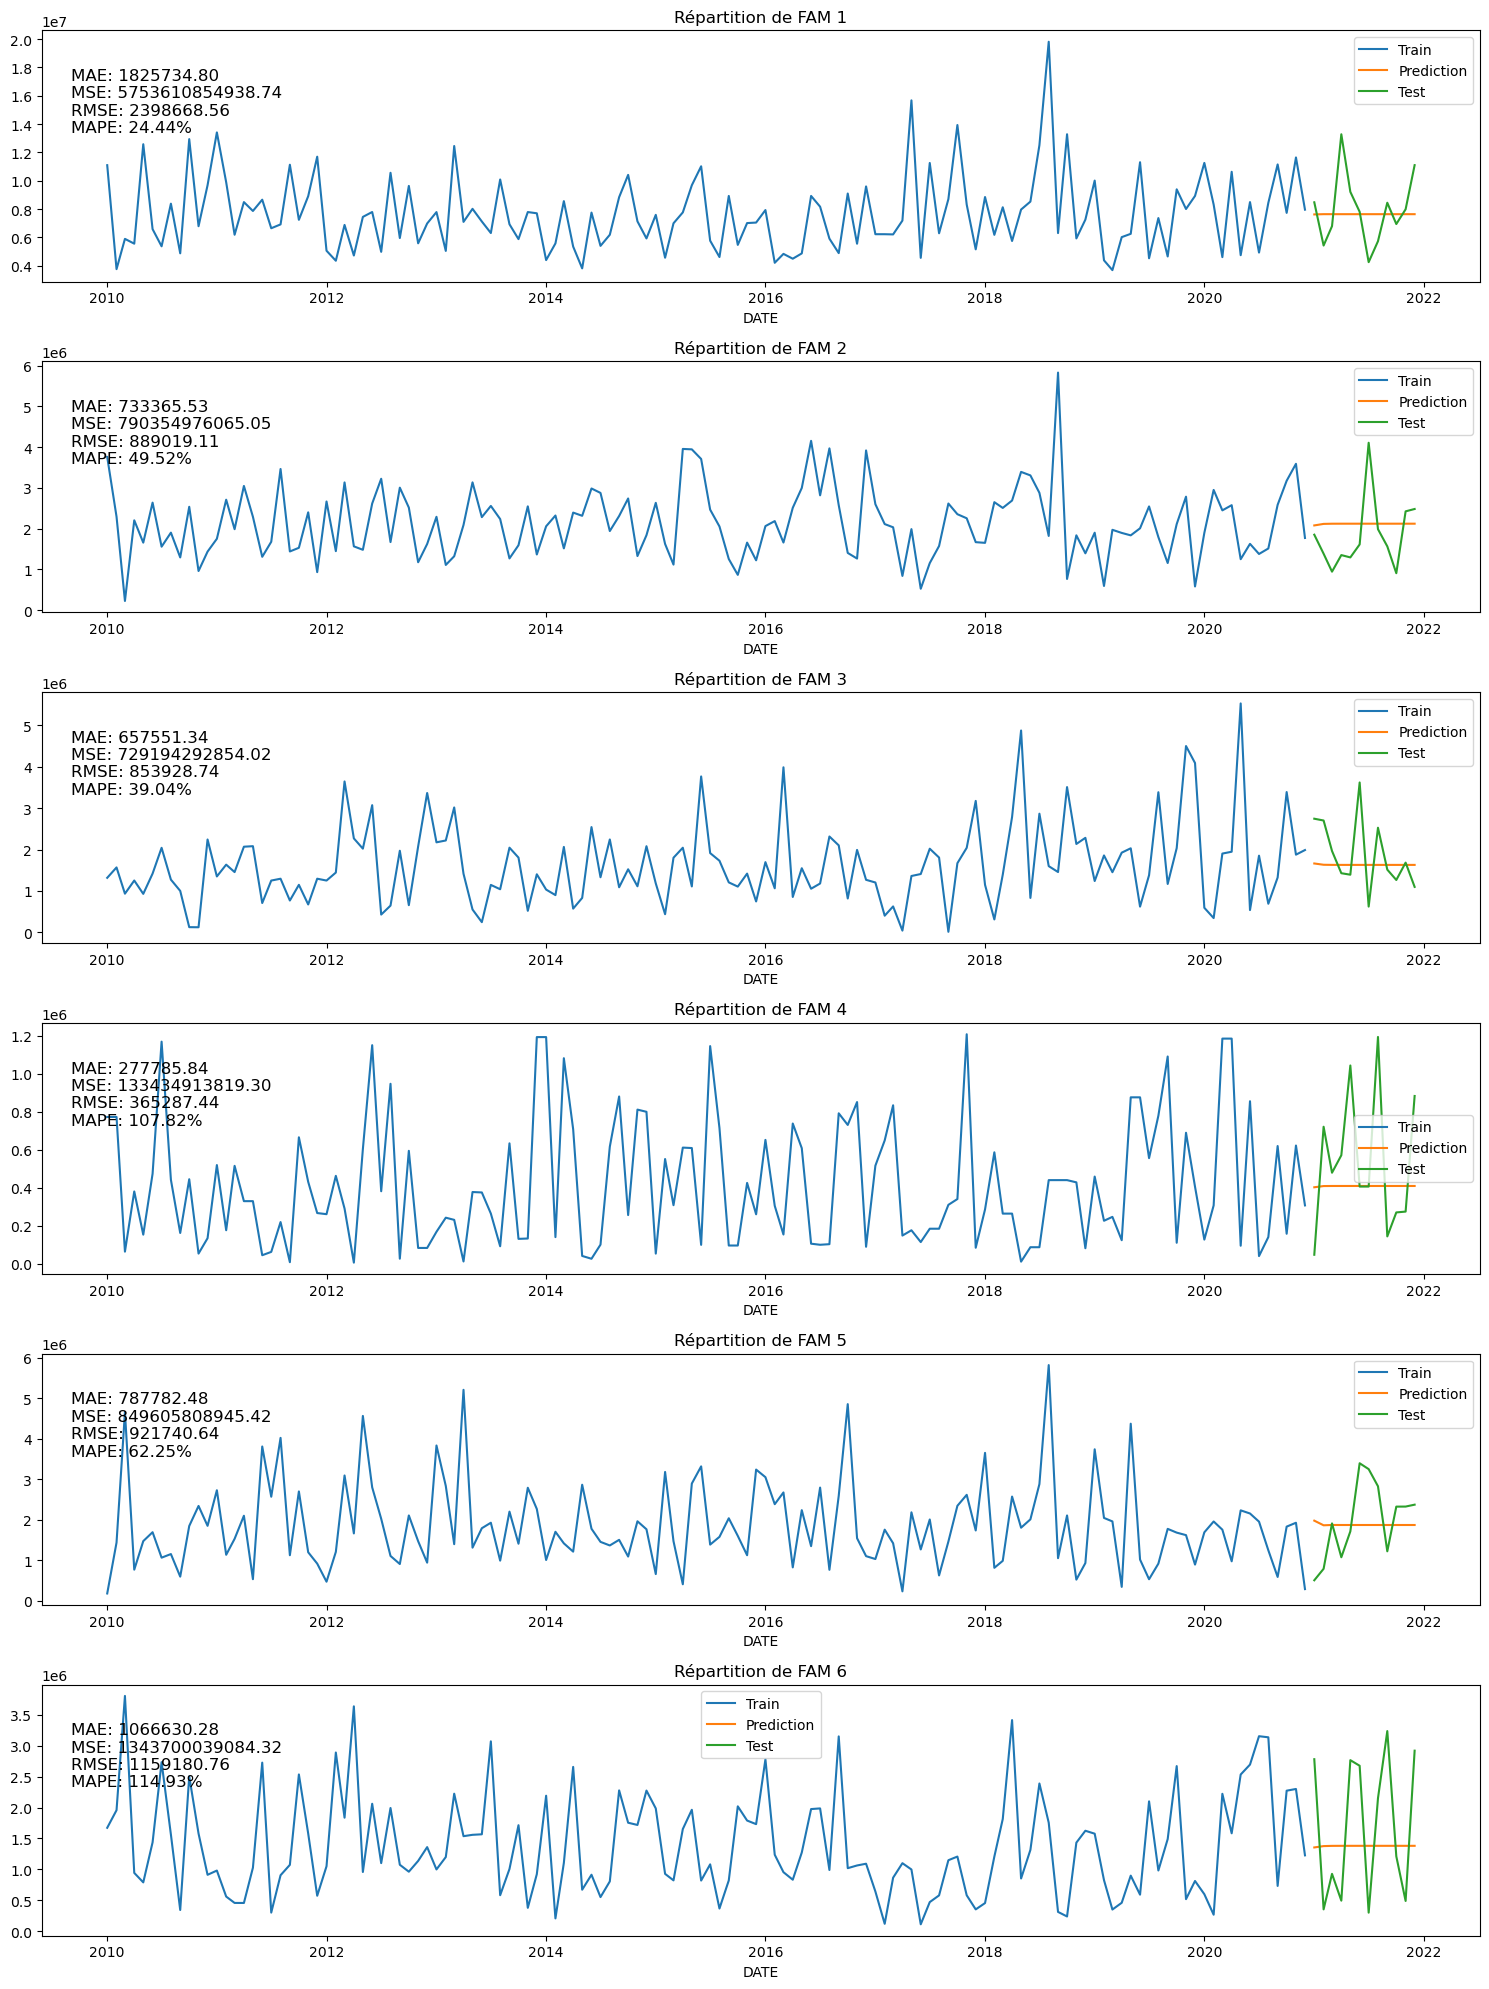

In [49]:
# Autorégression (AR)
from statsmodels.tsa.ar_model import AutoReg

variables = ['FAM 1', 'FAM 2', 'FAM 3','FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable}'][:132]
    test = df[f'{variable}'][132:]
    
    # entrainement du modéle (AR)
    model = AutoReg(train, lags=1)
    model_fit = model.fit()
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11)
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Moyenne mobile (MA)

La méthode de moyenne mobile (MA) modélise l'étape suivante de la séquence comme une fonction linéaire des erreurs résiduelles d'un processus moyen aux pas de temps précédents.

Un modèle de moyenne mobile est différent du calcul de la moyenne mobile de la série chronologique.

La notation du modèle implique de spécifier l'ordre du modèle q comme paramètre de la fonction MA, par exemple MA(q). Par exemple, MA(1) est un modèle de moyenne mobile de premier ordre.

La méthode convient aux séries chronologiques univariées sans composantes de tendance et saisonnières.

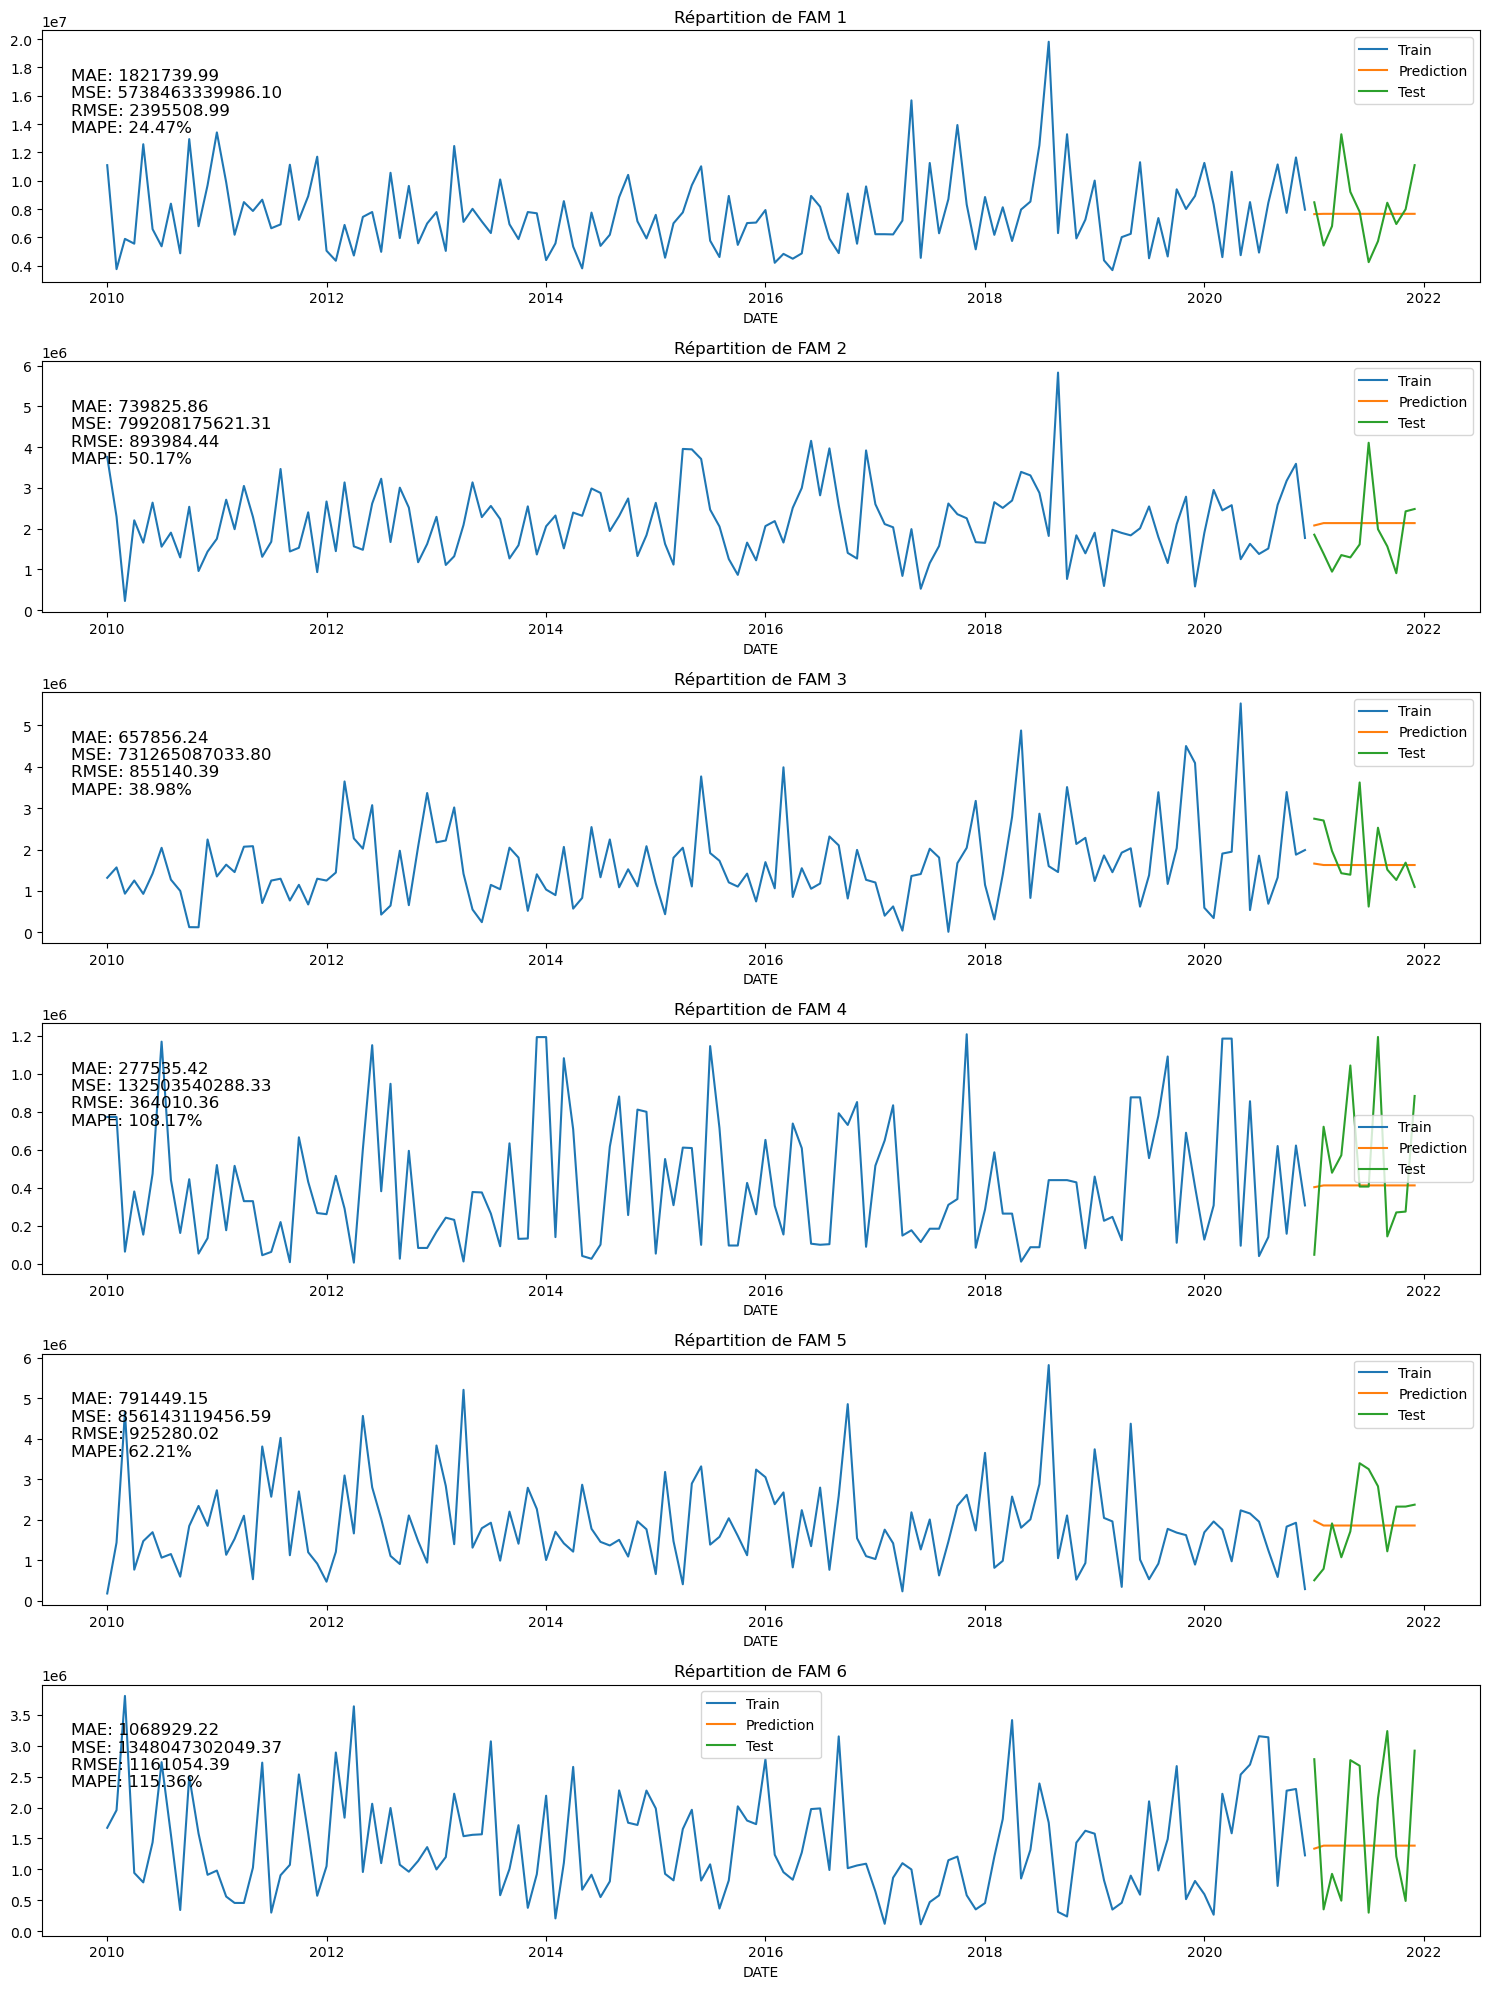

In [52]:
# Autorégression (MA)
from statsmodels.tsa.arima.model import ARIMA

variables = ['FAM 1', 'FAM 2', 'FAM 3','FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable}'][:132]
    test = df[f'{variable}'][132:]
    
    # entrainement du modéle (MA)
    model = ARIMA(train, order=(0, 0, 1))
    model_fit = model.fit()
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11)
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Moyenne mobile autorégressive (ARMA)

La méthode de moyenne mobile autorégressive (ARMA) modélise l'étape suivante de la séquence en tant que fonction linéaire des observations et des erreurs résiduelles aux pas de temps précédents.

Il combine à la fois les modèles d'autorégression (AR) et de moyenne mobile (MA).

La notation du modèle implique de spécifier l'ordre des modèles AR(p) et MA(q) comme paramètres d'une fonction ARMA, par exemple ARMA(p, q). Un modèle ARIMA peut être utilisé pour développer des modèles AR ou MA.

La méthode convient aux séries chronologiques univariées sans composantes de tendance et saisonnières.

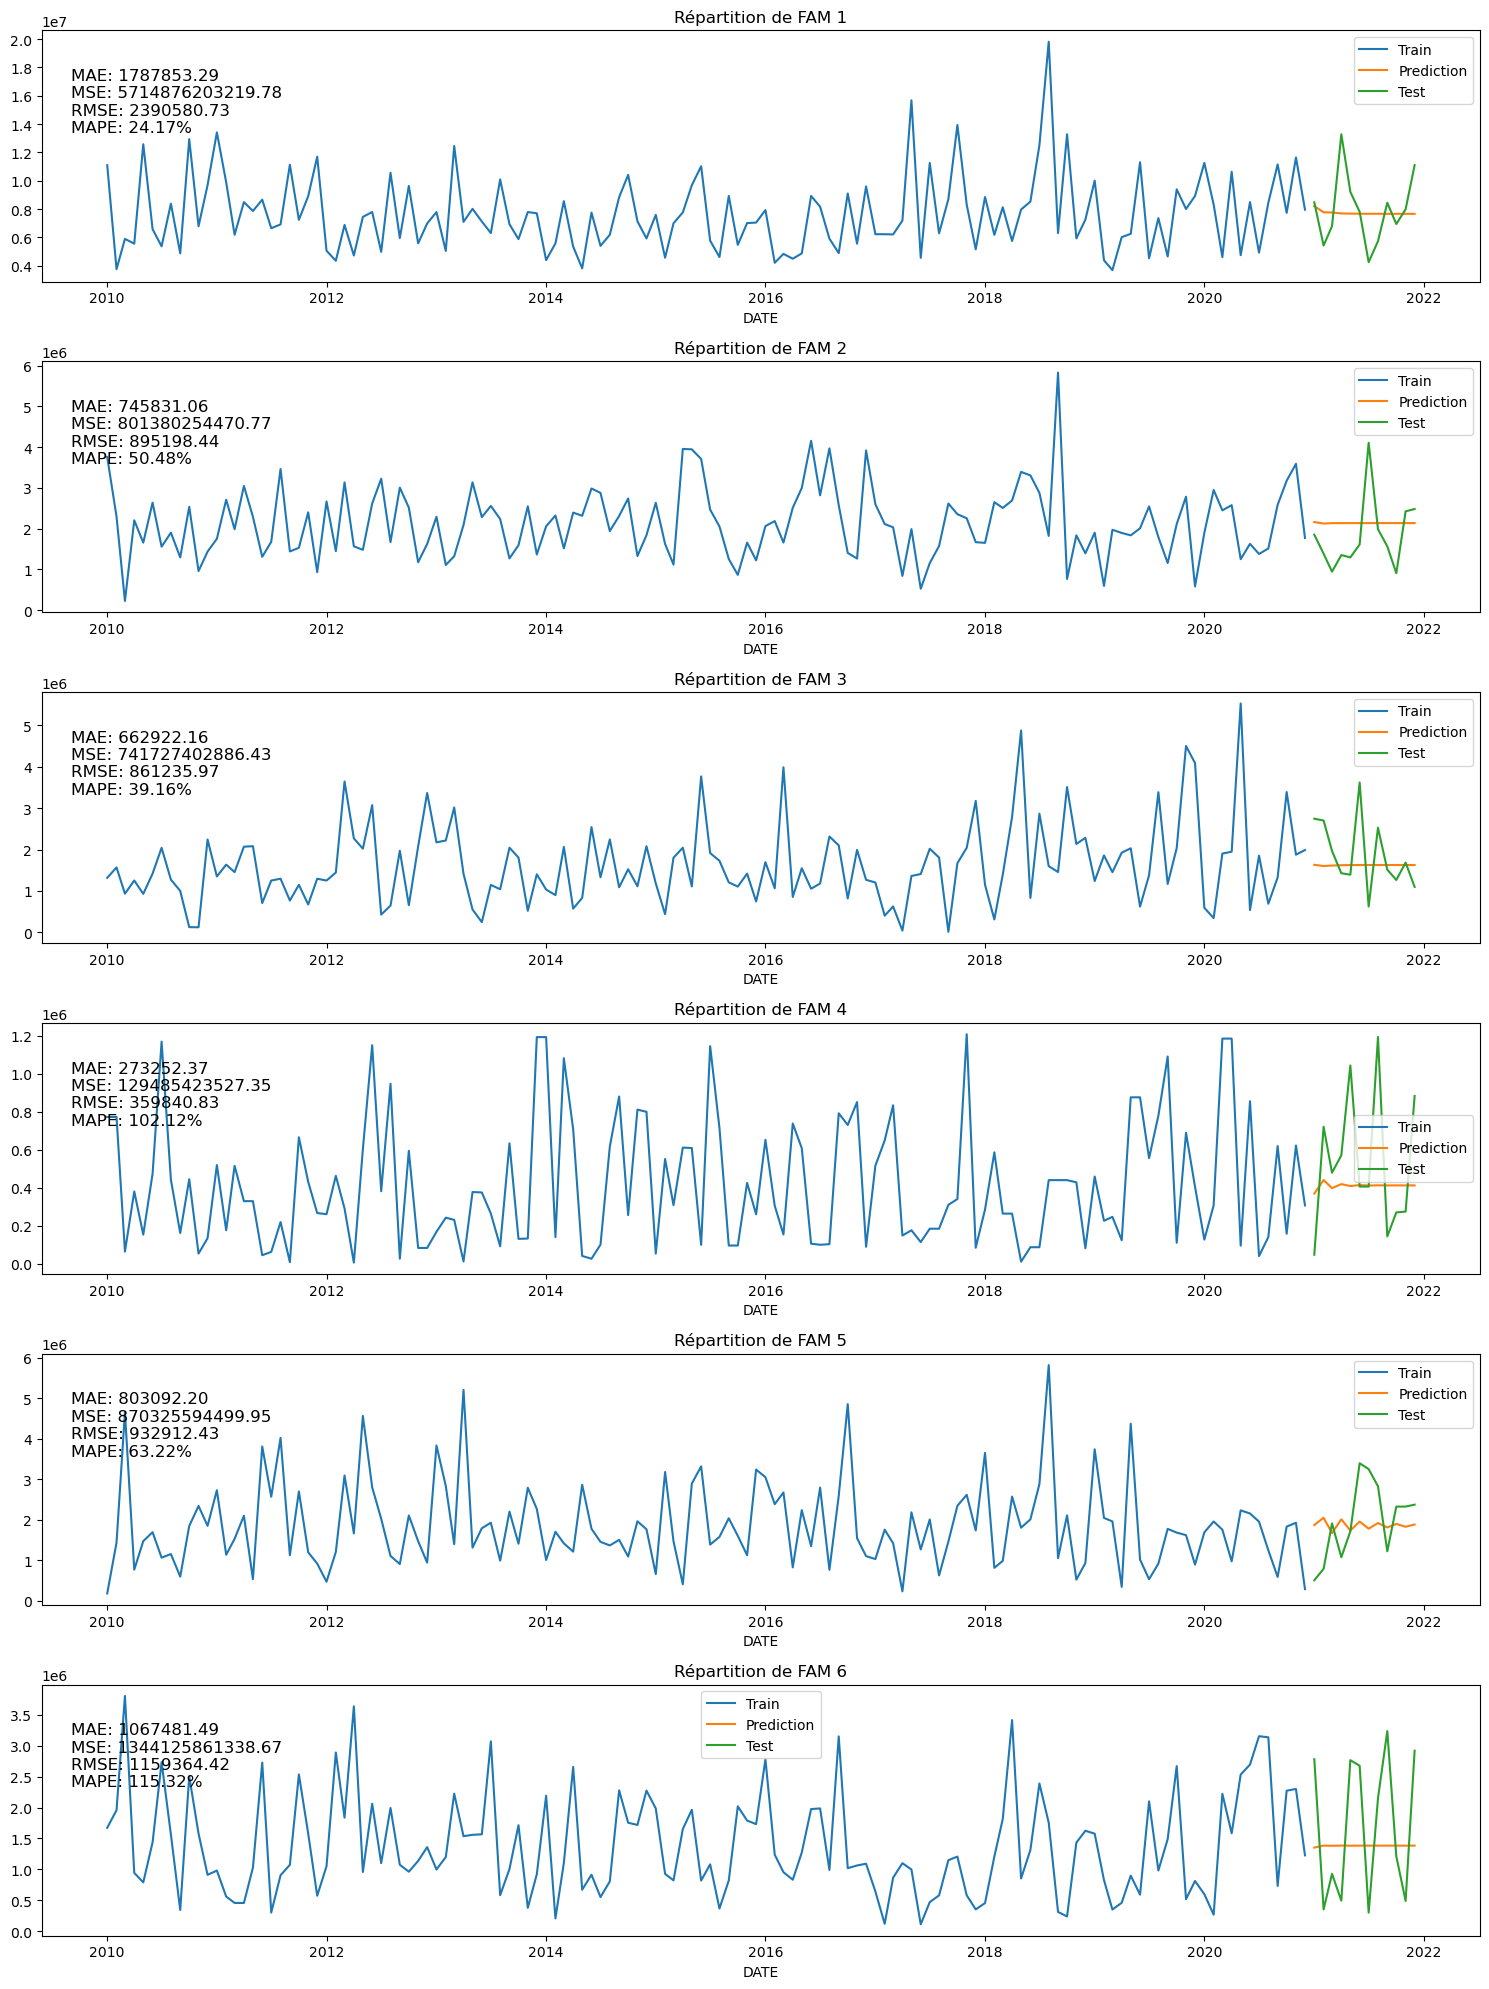

In [21]:
# Autorégression (ARMA)
from statsmodels.tsa.arima.model import ARIMA

variables = ['FAM 1', 'FAM 2', 'FAM 3','FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable}'][:132]
    test = df[f'{variable}'][132:]
    
    # entrainement du modéle (MA)
    model = ARIMA(train, order=(2, 0, 1))
    model_fit = model.fit()
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11)
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Moyenne mobile intégrée autorégressive (ARIMA)

La méthode ARIMA (Autoregressive Integrated Moving Average) modélise l'étape suivante de la séquence en tant que fonction linéaire des observations différenciées et des erreurs résiduelles aux pas de temps précédents.

Il combine à la fois des modèles d'autorégression (AR) et de moyenne mobile (MA) ainsi qu'une étape de prétraitement différencié de la séquence pour rendre la séquence stationnaire, appelée intégration (I).

La notation du modèle implique de spécifier l'ordre des modèles AR(p), I(d) et MA(q) comme paramètres d'une fonction ARIMA, par exemple ARIMA(p, d, q). Un modèle ARIMA peut également être utilisé pour développer des modèles AR, MA et ARMA.

La méthode convient aux séries chronologiques univariées avec tendance et sans composantes saisonnières.

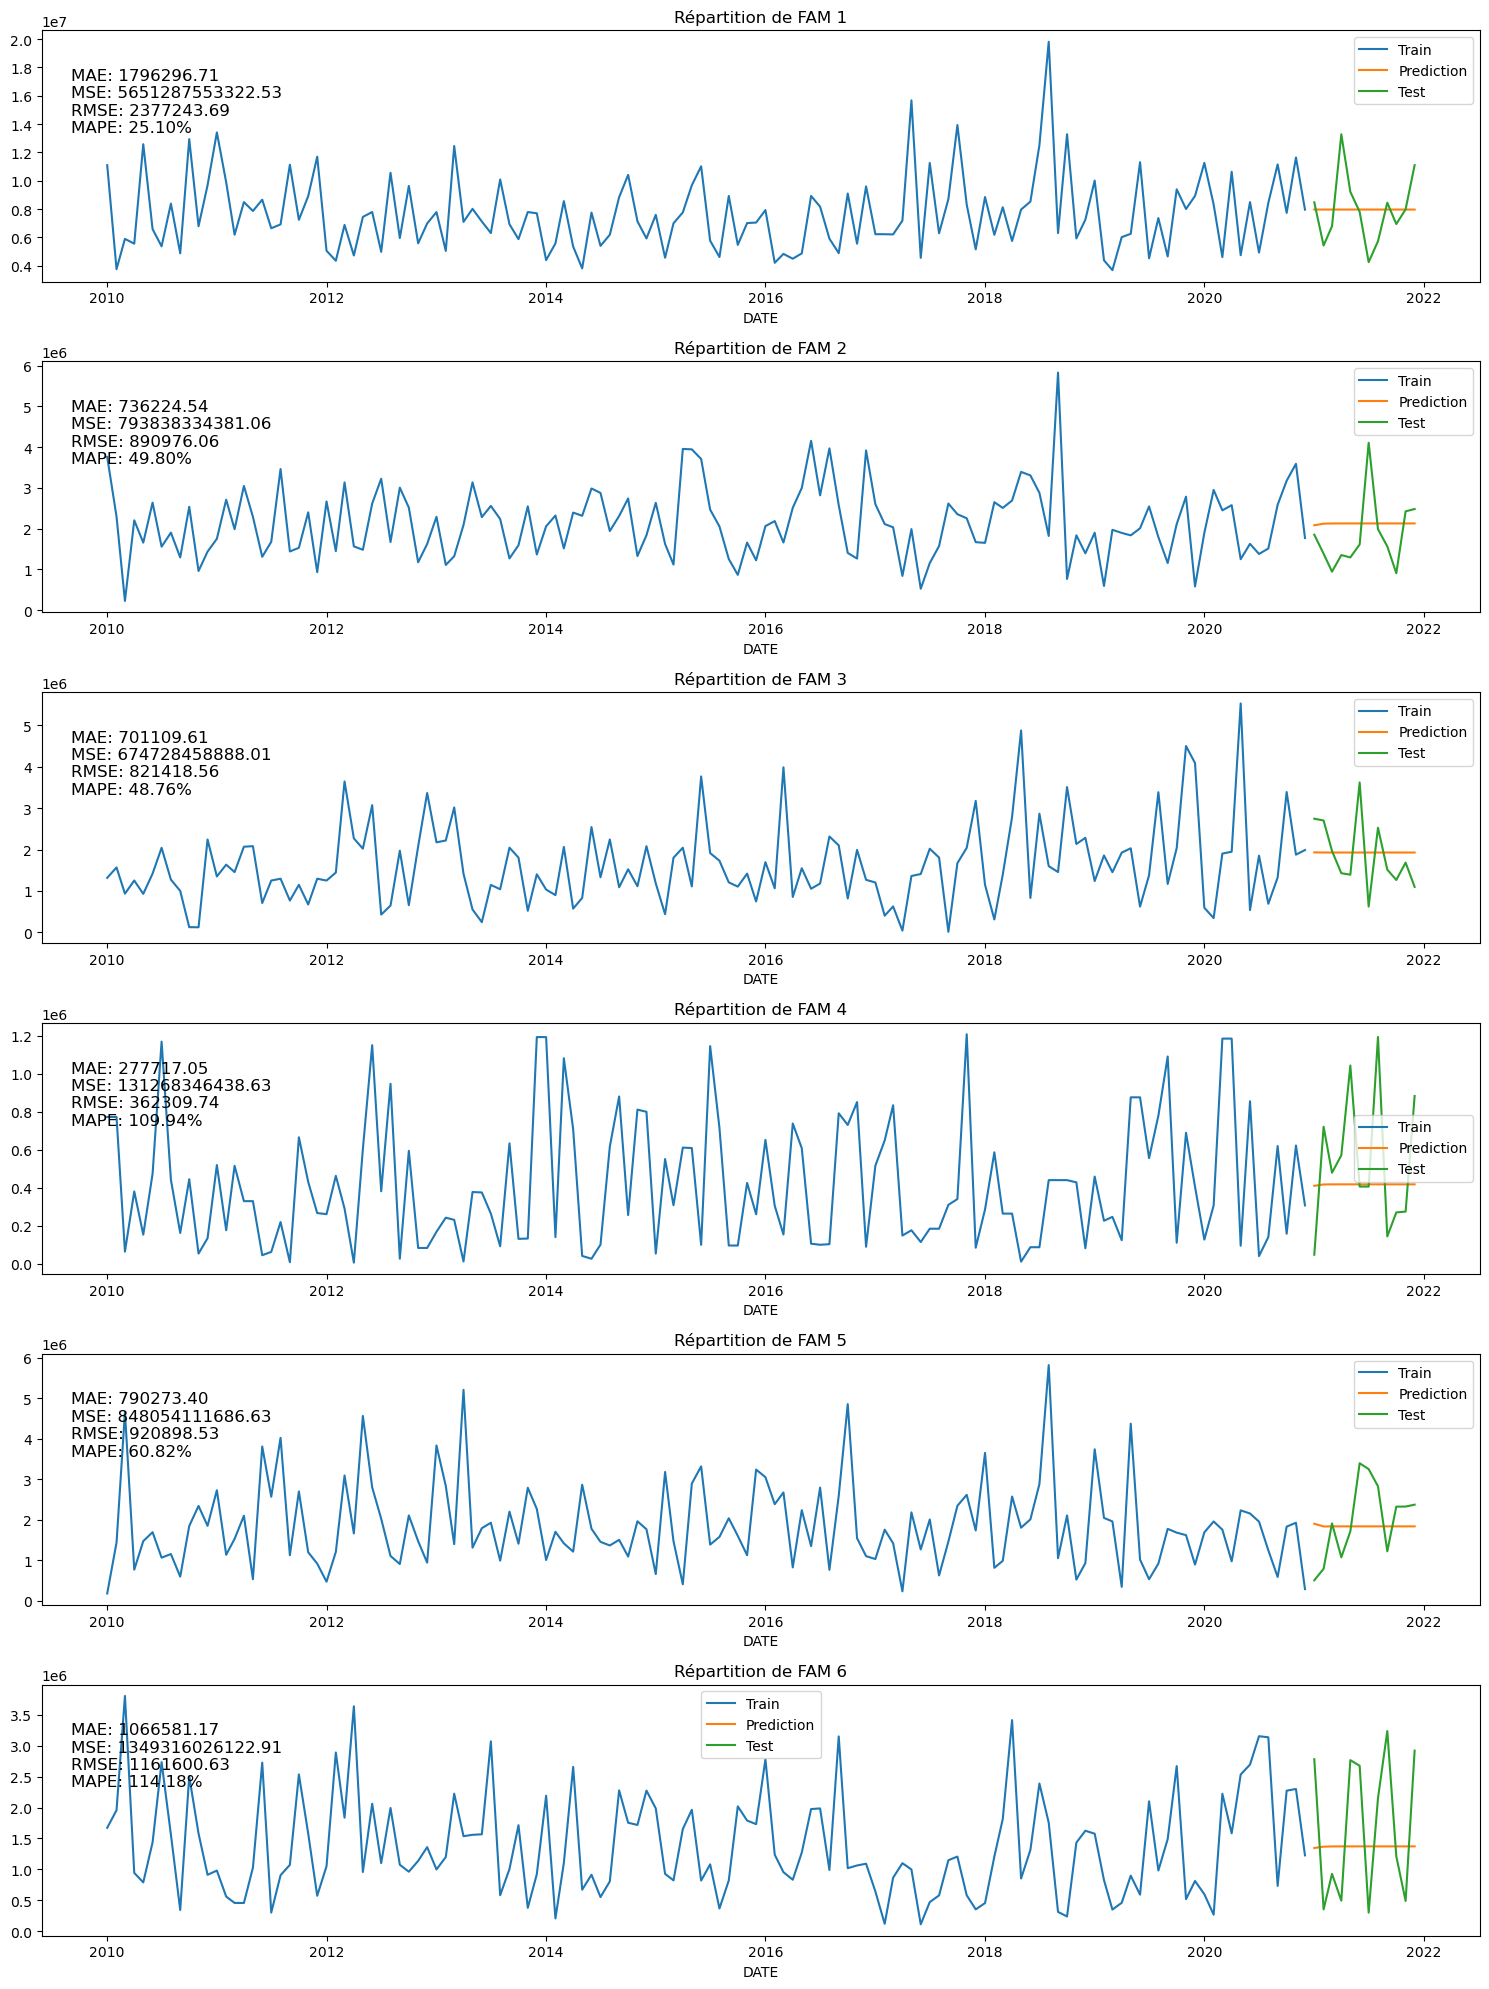

In [23]:
# Autorégression (ARIMA)
from statsmodels.tsa.arima.model import ARIMA

variables = ['FAM 1', 'FAM 2', 'FAM 3','FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable}'][:132]
    test = df[f'{variable}'][132:]
    
    # entrainement du modéle (MA)
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit()
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11,typ='levels')
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Moyenne mobile intégrée autorégressive saisonnière (SARIMA)

La méthode de moyenne mobile intégrée autorégressive saisonnière (SARIMA) modélise l'étape suivante de la séquence en tant que fonction linéaire des observations différenciées, des erreurs, des observations saisonnières différenciées et des erreurs saisonnières aux pas de temps précédents.

Il combine le modèle ARIMA avec la capacité d'effectuer les mêmes modélisations d'autorégression, de différenciation et de moyenne mobile au niveau saisonnier.

La notation du modèle implique de spécifier l'ordre des modèles AR(p), I(d) et MA(q) comme paramètres d'une fonction ARIMA et AR(P), I(D), MA(Q) et m paramètres au niveau saisonnier, par exemple SARIMA(p, d, q)(P, D, Q)m où « m » est le nombre de pas de temps dans chaque saison (la période saisonnière). Un modèle SARIMA peut être utilisé pour développer des modèles AR, MA, ARMA et ARIMA.

La méthode convient aux séries chronologiques univariées avec des composantes tendancielles et/ou saisonnières.

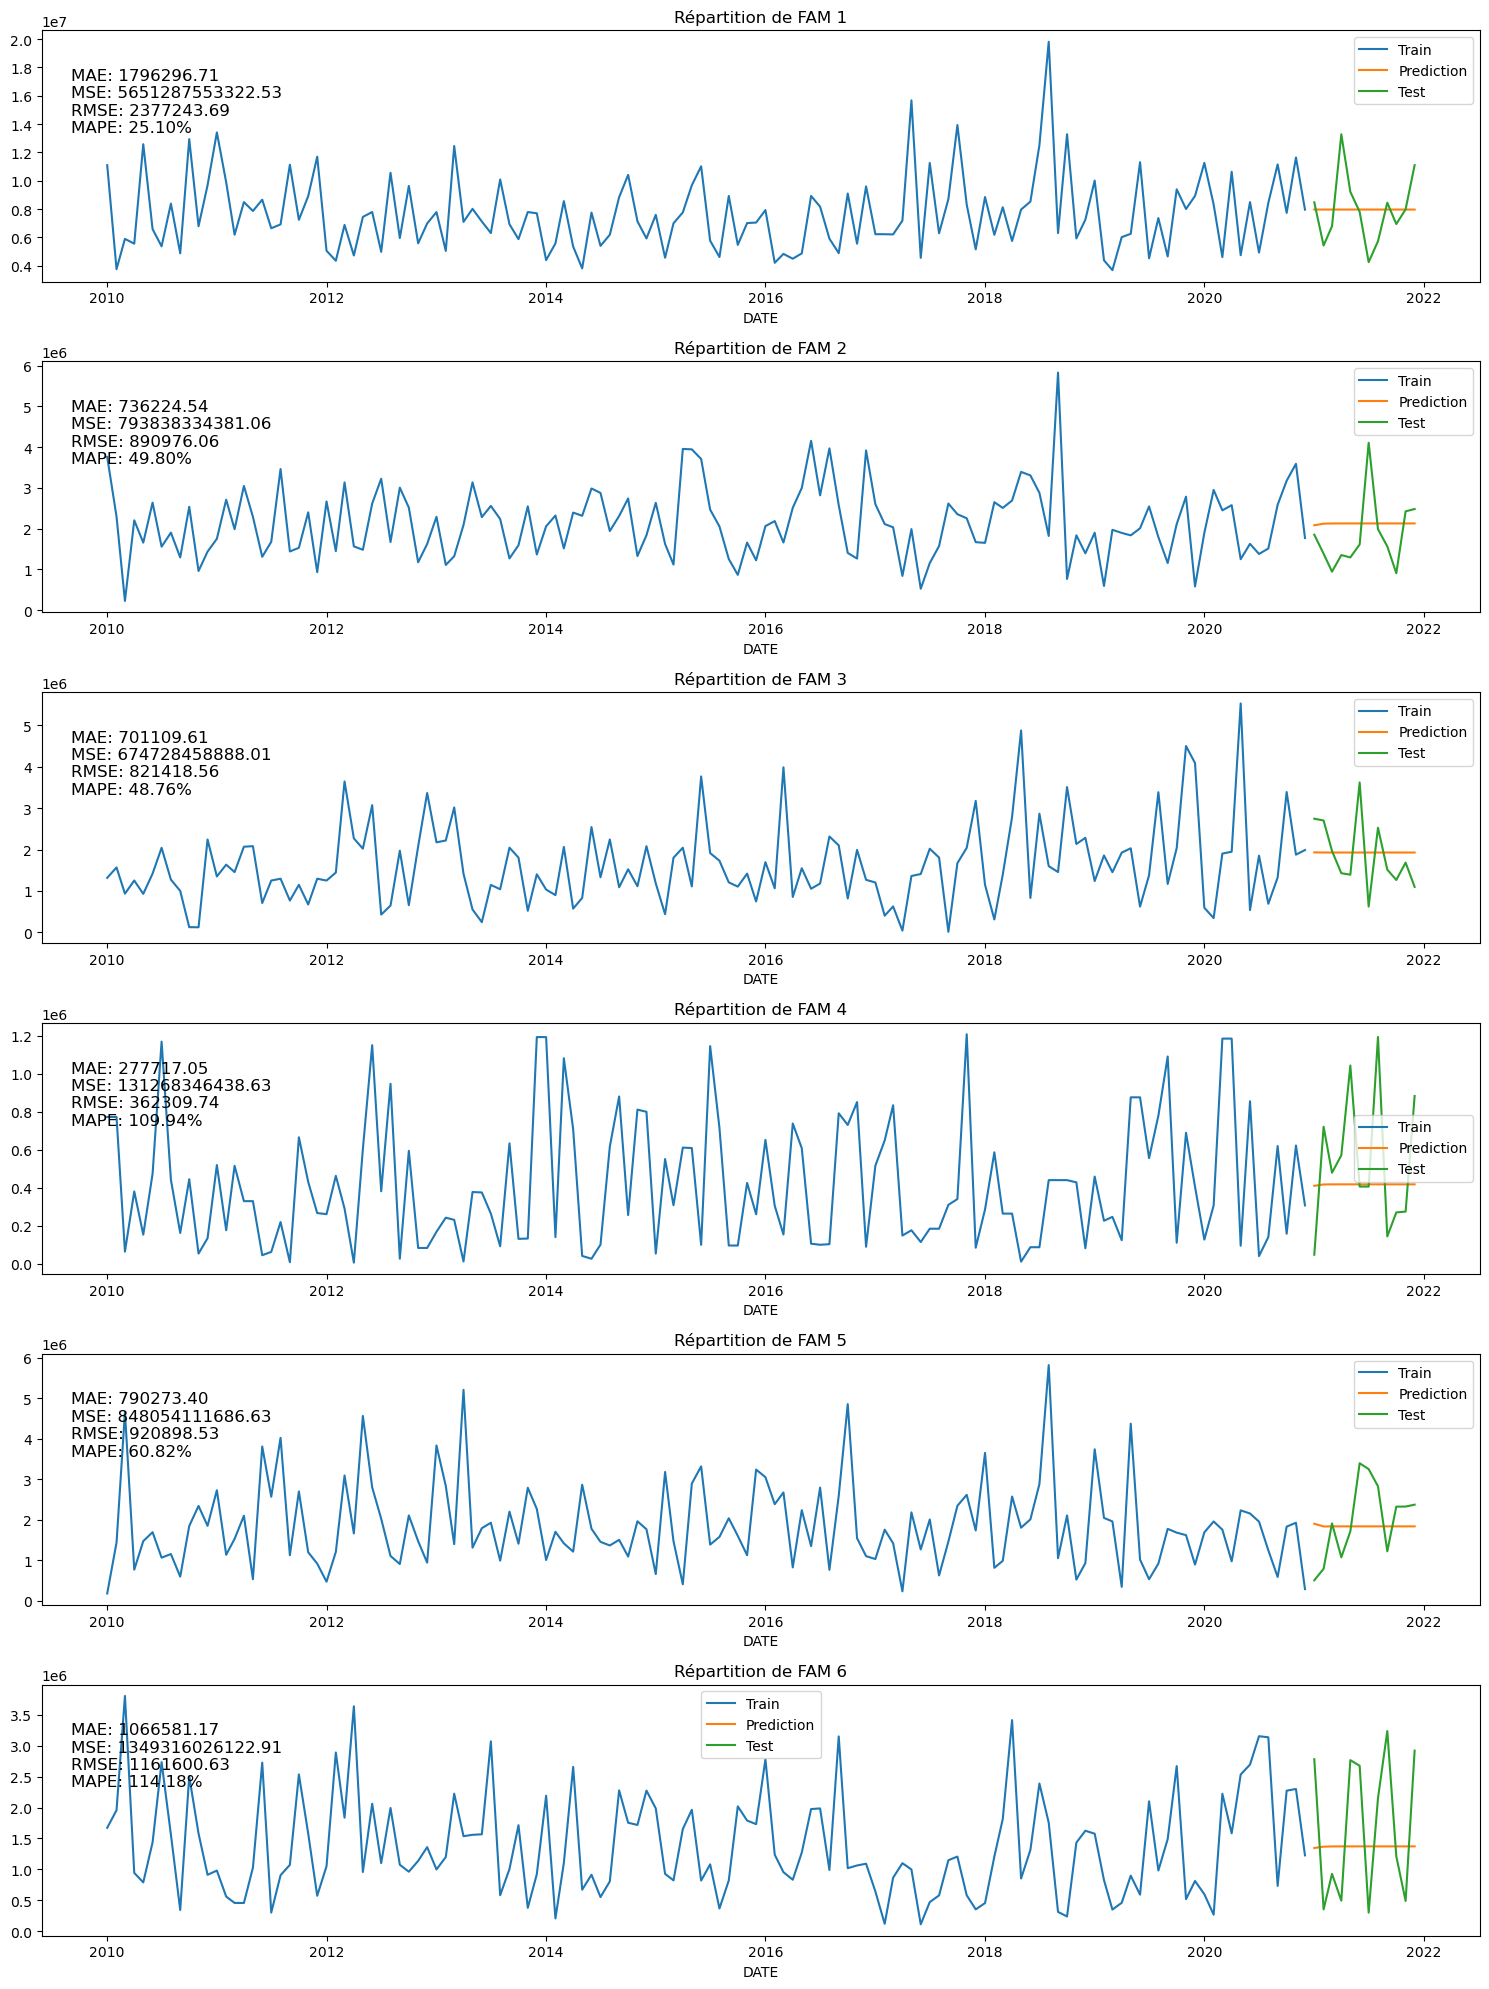

In [24]:
# Autorégression (SARIMA)
from statsmodels.tsa.statespace.sarimax import SARIMAX

variables = ['FAM 1', 'FAM 2', 'FAM 3','FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable}'][:132]
    test = df[f'{variable}'][132:]
    
    # entrainement du modéle (MA)
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=False)
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11,typ='levels')
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Lissage exponentiel simple (SES)

La méthode de lissage exponentiel simple (SES) modélise le pas de temps suivant comme une fonction linéaire à pondération exponentielle des observations aux pas de temps précédents.

La méthode convient aux séries chronologiques univariées sans composantes de tendance et saisonnières

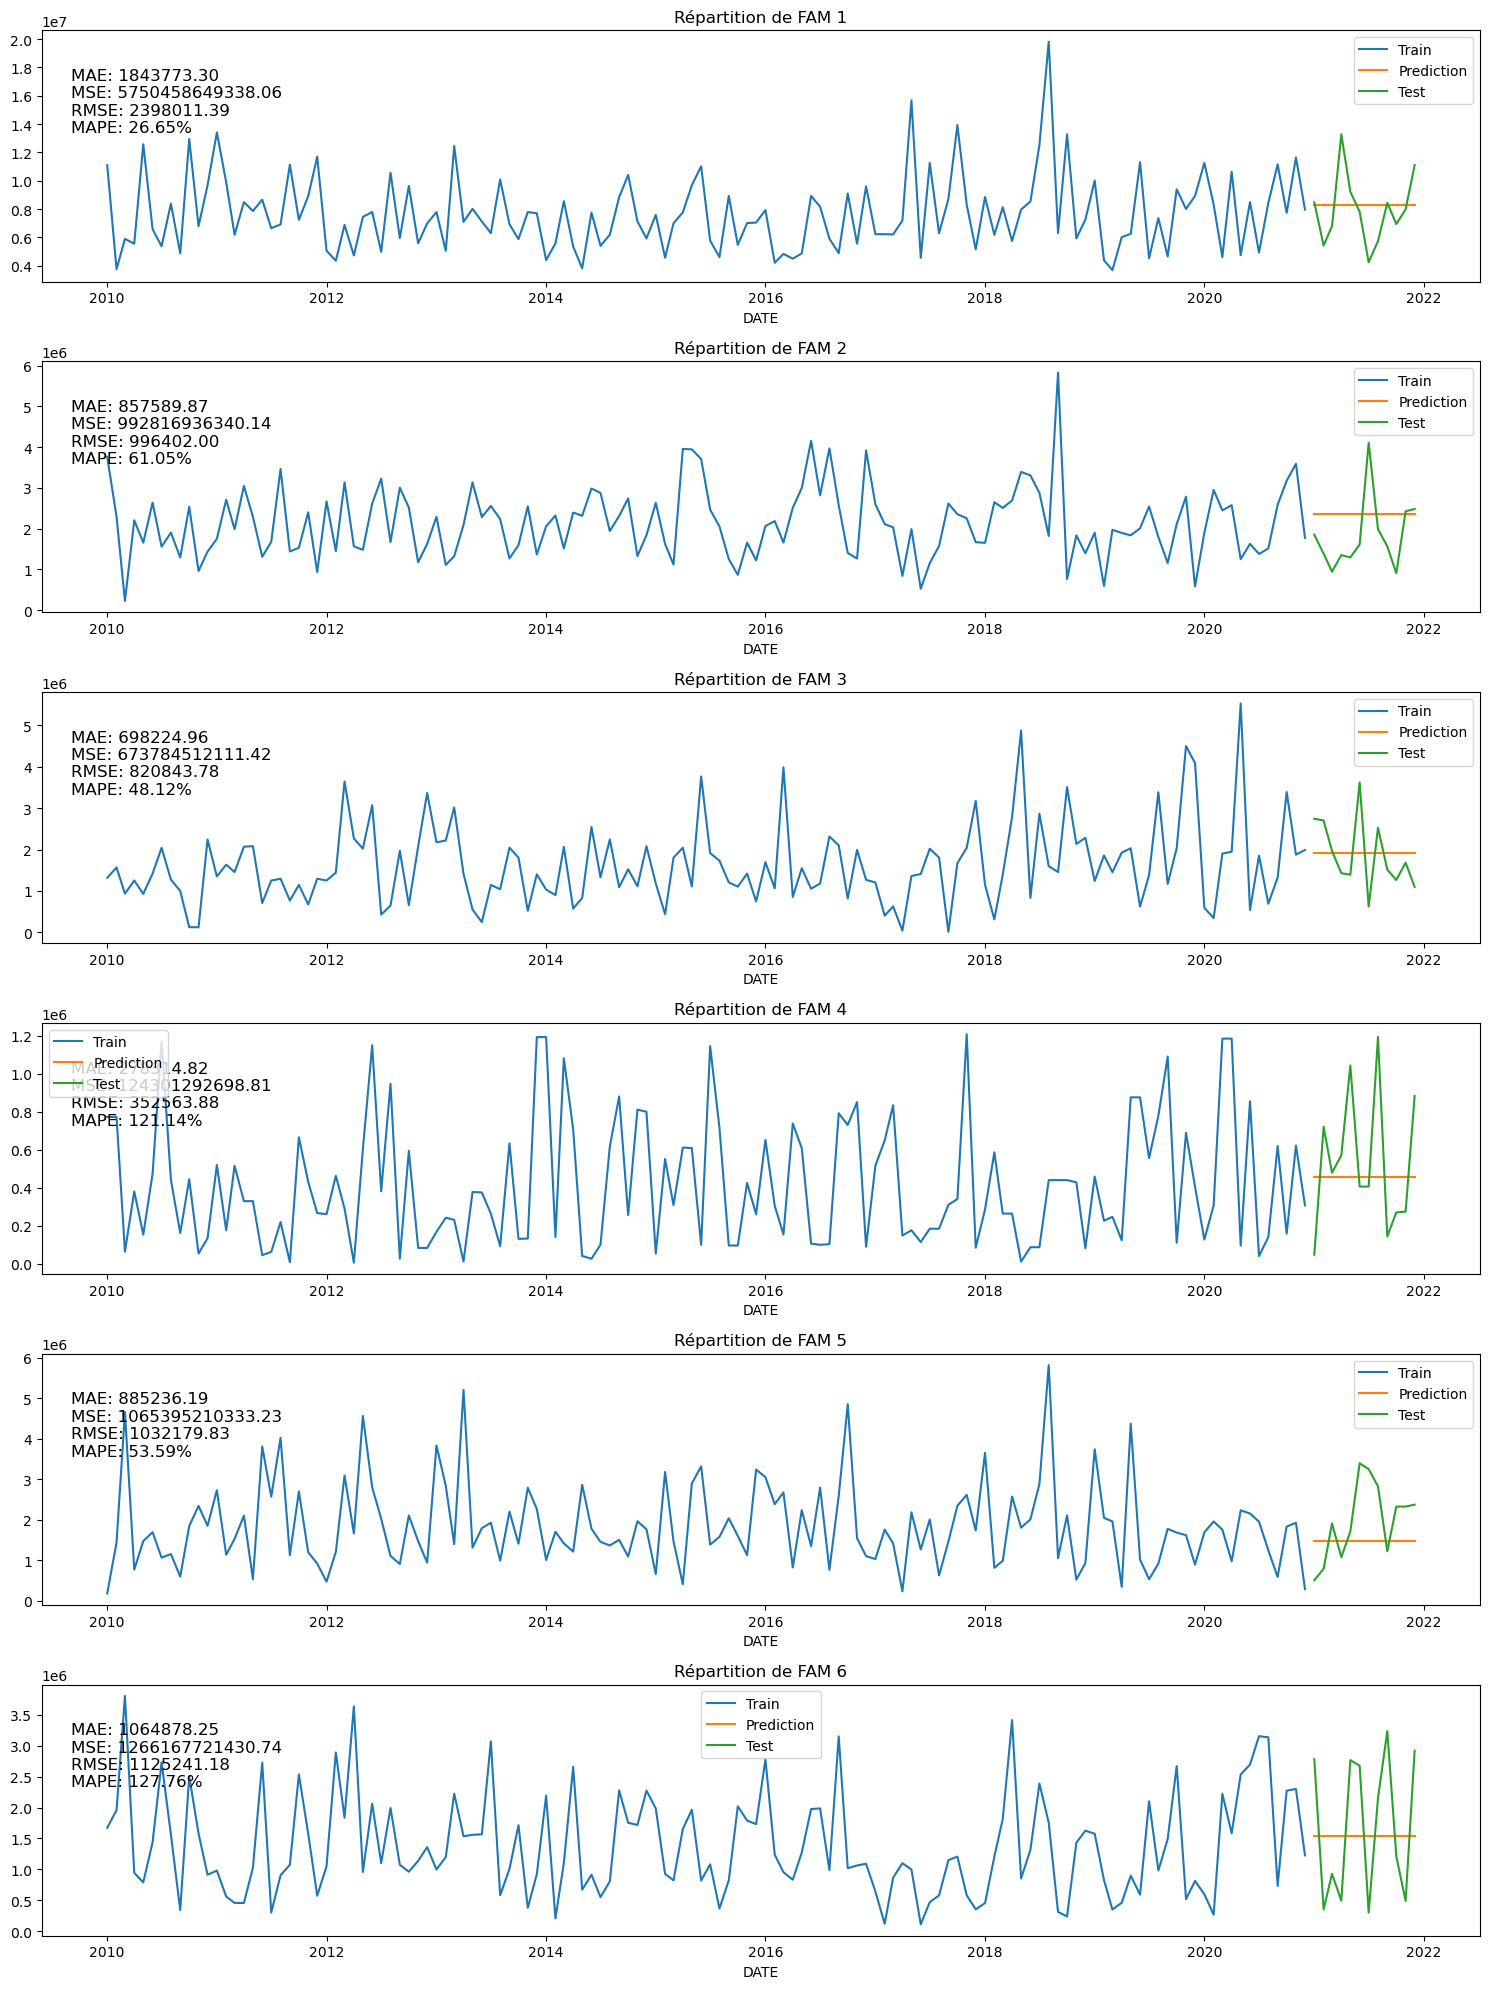

In [33]:
# Autorégression (SES)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

variables = ['FAM 1', 'FAM 2', 'FAM 3','FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable}'][:132]
    test = df[f'{variable}'][132:]
    
    # entrainement du modéle (MA)
    model = SimpleExpSmoothing(train)
    model_fit = model.fit()
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11)
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Lissage exponentiel de Holt Winter (HWES)

La méthode de lissage exponentiel de Holt Winter (HWES), également appelée méthode de lissage exponentiel triple, modélise le pas de temps suivant comme une fonction linéaire à pondération exponentielle des observations aux pas de temps précédents, en tenant compte des tendances et de la saisonnalité.

La méthode convient aux séries chronologiques univariées avec des composantes tendancielles et/ou saisonnières.

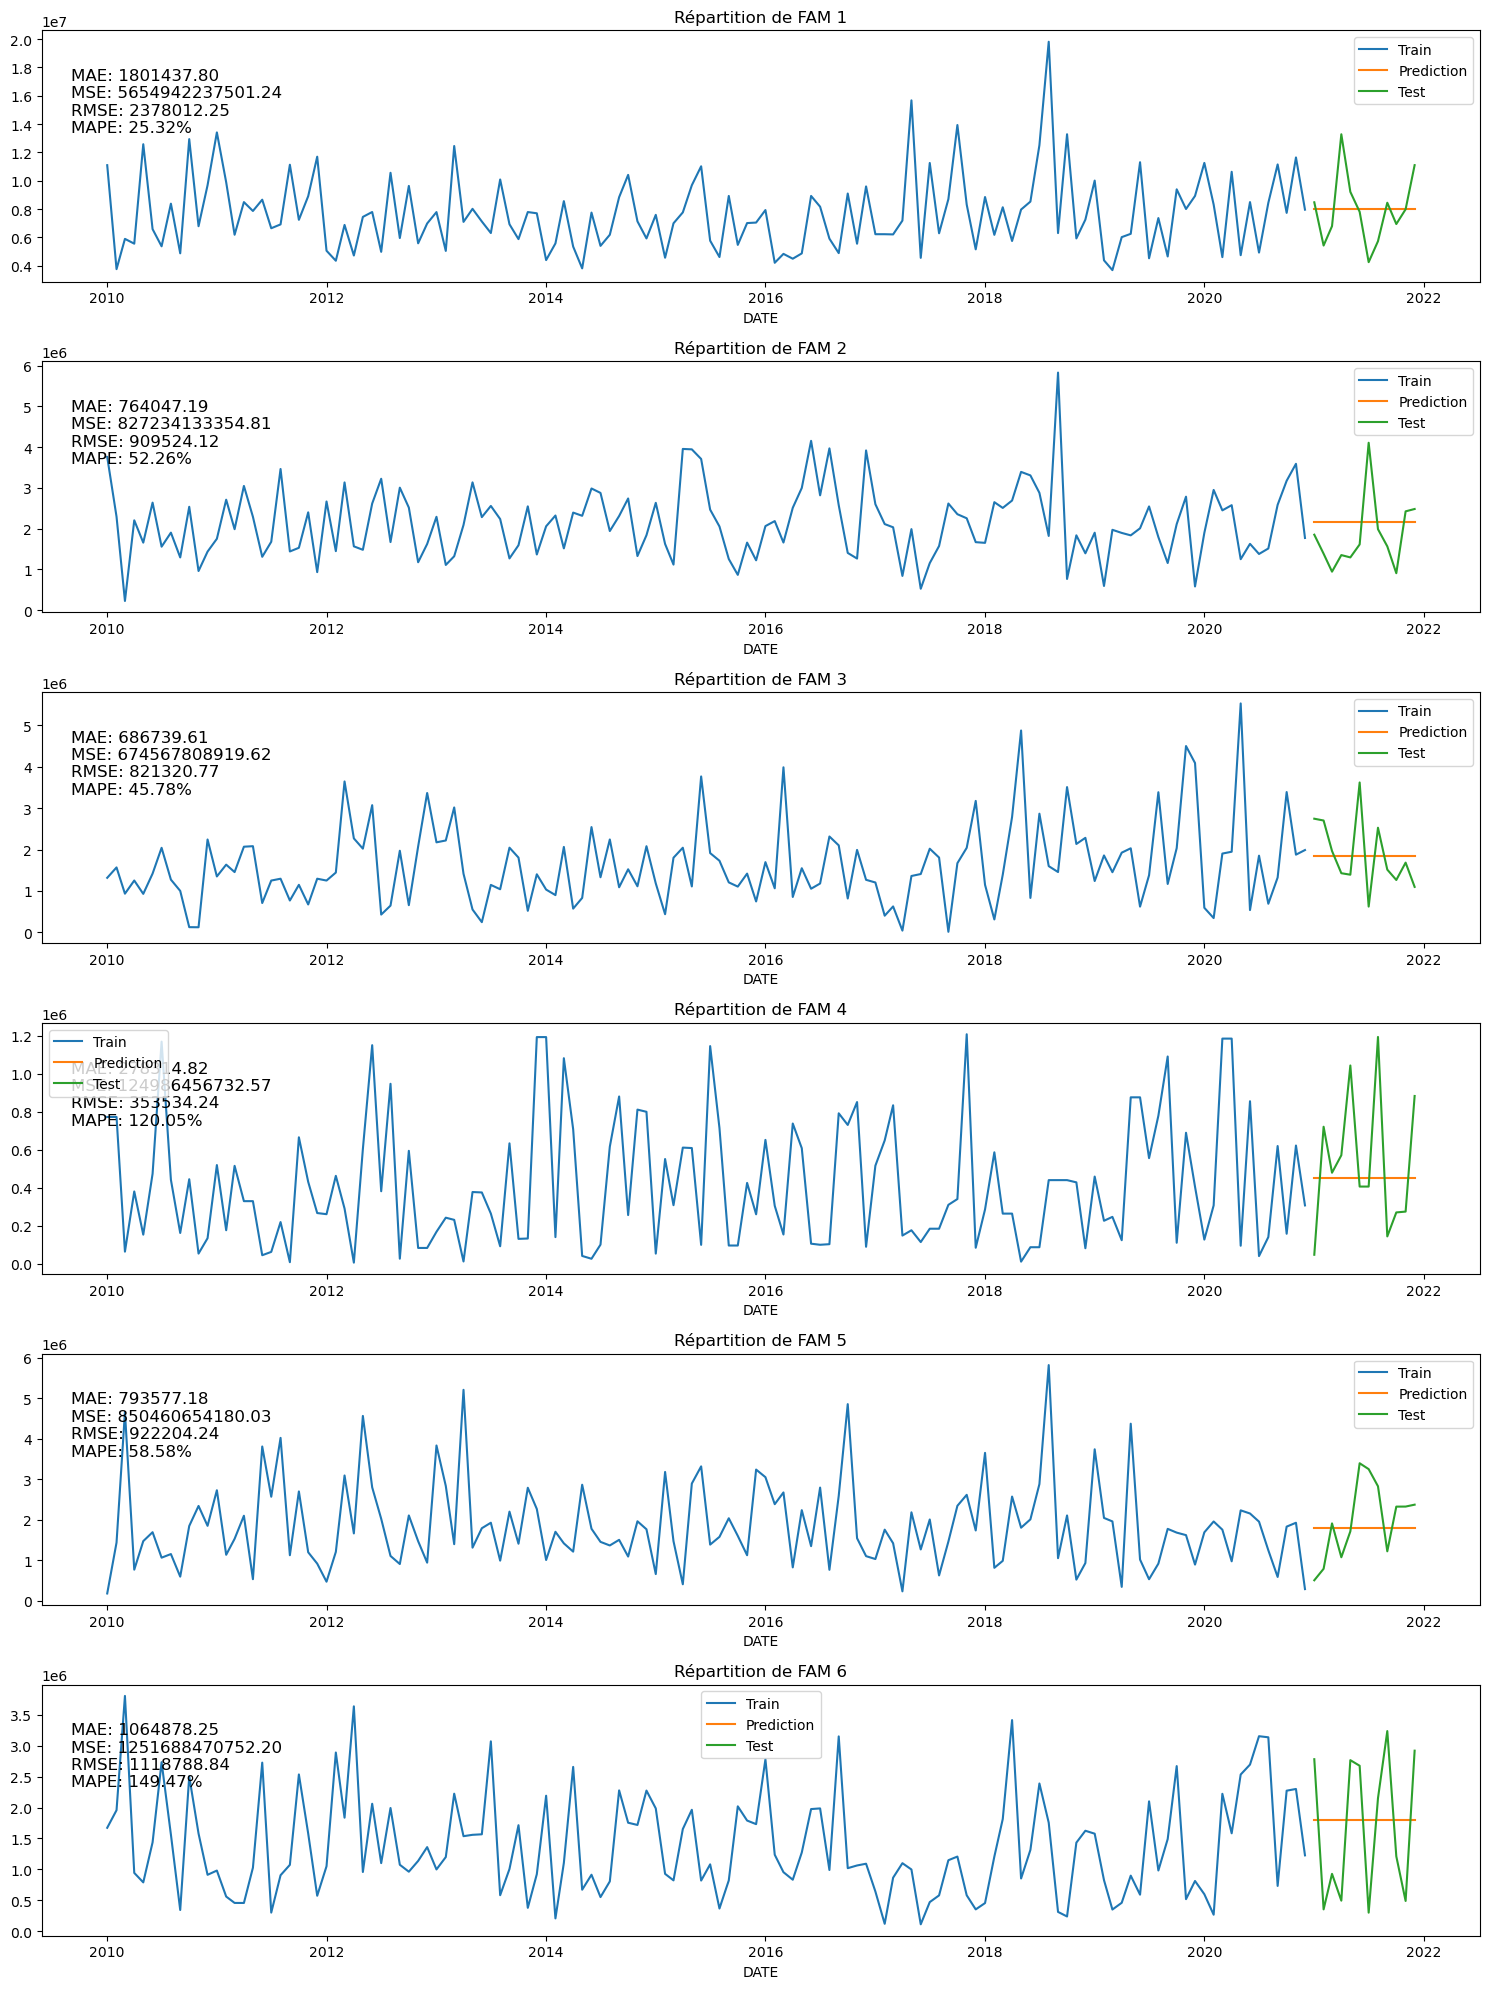

In [91]:
# Autorégression (HWES)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

variables = ['FAM 1', 'FAM 2', 'FAM 3','FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable}'][:132]
    test = df[f'{variable}'][132:]
    
    # entrainement du modéle
    model = ExponentialSmoothing(train)
    model_fit = model.fit()
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11)
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [92]:
from statsmodels.tsa.seasonal import STL

# Decompose the time series
decomposition = STL(df["FAM 1"], seasonal=13)  # 13 for monthly data with yearly seasonality
result = decomposition.fit()

seasonal_component = result.seasonal

### Seasonal Decomposition of Time Series (STL)

AttributeError: 'DecomposeResult' object has no attribute 'forecast'

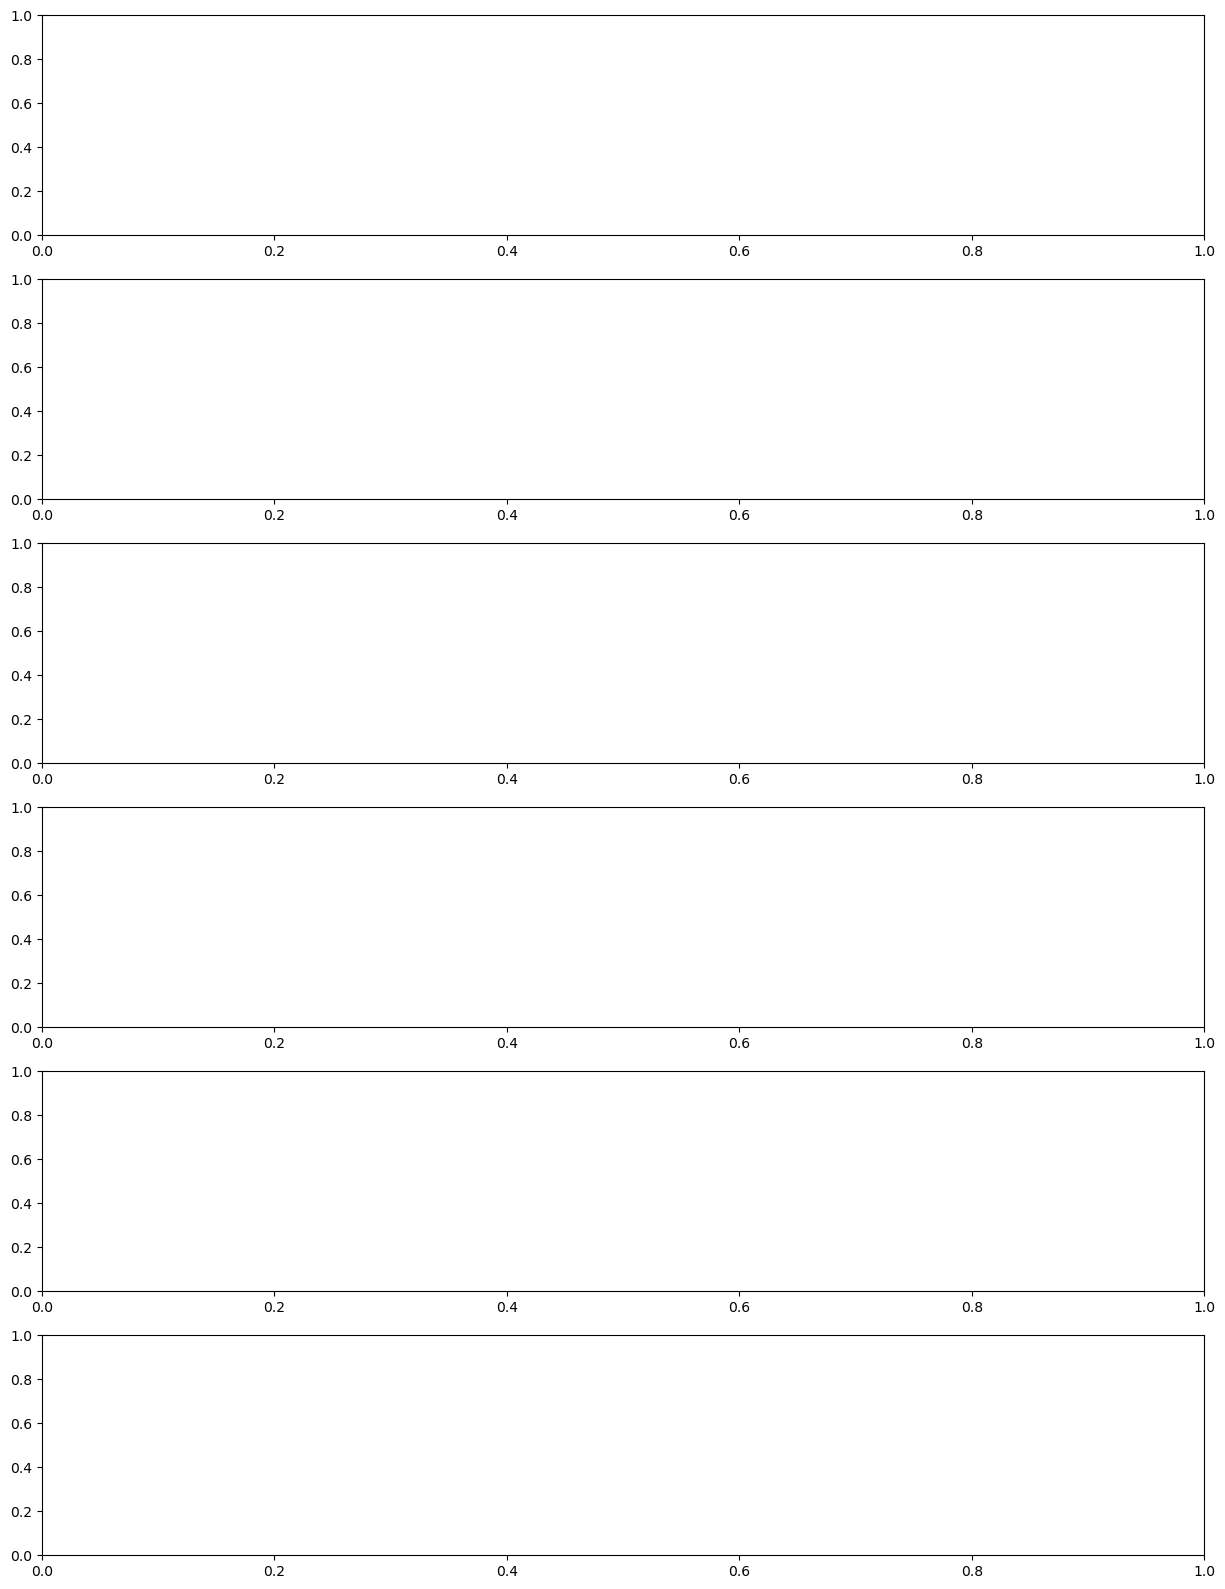

In [101]:
# Autorégression (HWES)
from statsmodels.tsa.seasonal import STL

variables = ['FAM 1', 'FAM 2', 'FAM 3','FAM 4', 'FAM 5', 'FAM 6']

# Créer une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

# Parcourir chaque variable et créer un histogramme dans un sous-graphique
for i, variable in enumerate(variables):
    
    # train test split
    train = df[f'{variable}'][:132]
    test = df[f'{variable}'][132:]
    
    # entrainement du modéle
    model = STL(train, seasonal=13)
    result = model.fit()
    
    # Get the seasonal, trend, and residual components
    seasonal_component = result.seasonal
    trend_component = result.trend
    residual_component = result.resid

    # Forecast the components into the future (adjust the steps parameter)
    forecast_steps = 12
    forecasted_seasonal = result.forecast(steps=forecast_steps).seasonal
    forecasted_trend = result.forecast(steps=forecast_steps).trend
    forecasted_residual = result.forecast(steps=forecast_steps).resid

    # Combine the components to get the full forecast
    forecasted_values = forecasted_seasonal + forecasted_trend + forecasted_residual
    
    # prediction
    prediction = model_fit.predict(len(train), len(train)+11)
    
    # traçage des courbes
    sns.lineplot(x=train.index , y=train.values, ax=axes[i],label='Train')
    sns.lineplot(x=prediction.index , y=prediction.values, ax=axes[i],label='Prediction')
    sns.lineplot(x=test.index , y=test.values, ax=axes[i],label='Test')
    
    # evaluation de chaque modéle
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - prediction) / test)) * 100
    
    axes[i].set_title(f'Répartition de {variable}' )
    axes[i].text(0.02, 0.85, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%',
                 transform=axes[i].transAxes, fontsize=12, va='top', ha='left', color='black')
    

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()